In [ ]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("Dataset/liver+normal.csv")
df = shuffle(df, random_state=42).reset_index(drop=True)

display(df.head(5), df.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/liver+normal.csv'

In [2]:
def preprocessing(df):
    
    # Drop type Columns
    if "type" in df.columns:
        df = df.drop(columns="type")

    # Convert label to binary type:
    if 'cancer_type' in df.columns and not df['cancer_type'].isin([0, 1]).all():
        df['cancer_type'] = df['cancer_type'].map({'liver': 1, 'normal': 0})
    
    # Get X,y
    target = 'cancer_type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y 

X,y = preprocessing(df)
display(X.head(5), X.shape)
display(y.head(5), y.shape)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,8.652082,5.829330,4.132451,6.030430,1.927296,6.580177,4.980347,3.076874,7.718815,2.746636,...,11.471340,11.092752,12.632323,12.748295,8.793452,7.316137,7.206730,1.760923,2.028388,2.211593
1,7.423328,7.450621,9.333897,7.656993,2.911457,7.410254,5.000415,5.582219,4.886996,8.459350,...,11.740758,10.860109,13.503857,13.180561,3.346297,3.160720,2.810799,2.350106,3.004168,2.535307
2,10.433211,7.145168,7.249280,7.694716,3.192009,8.595681,5.396035,7.898516,9.596738,4.069072,...,12.475954,11.520951,13.896514,13.616080,3.799339,3.790774,3.159305,2.970557,3.527868,3.195505
3,11.022610,6.666889,6.822420,8.014927,3.529340,8.714623,5.759964,4.911467,6.880929,3.633933,...,12.778428,12.178552,13.903772,13.836587,9.775054,5.620937,7.650794,3.365332,3.695016,3.658442
4,7.190901,6.591266,6.087219,7.647090,2.929891,7.258371,5.000119,4.869540,5.076104,11.863726,...,11.455975,10.532726,13.192335,12.715543,3.565291,3.211610,2.666262,2.482683,3.016364,2.746953


(144, 54675)

0    0
1    1
2    0
3    0
4    1
Name: cancer_type, dtype: int64

(144,)

In [3]:
# Method 1: Variance Threshold (Assume Features with higher variance => better)
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

threshold = 0.01
selector = VarianceThreshold(threshold=threshold)
X_var = selector.fit_transform(X)

selected_feature_indices = selector.get_support(indices=True)
X_var = X.columns[selected_feature_indices]
print(f"Number of selected features: {len(X_var)}")
print(f"Selected features: {X_var}")

Number of selected features: 54675
Selected features: Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)


In [4]:
# Method 2: Unvariate feature selection method (Based on their relation with output)
# ANOVA f-statistics

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 1000 features based on ANOVA F-statistic
k_best_selector = SelectKBest(score_func=f_classif, k=300)
X_anova = k_best_selector.fit_transform(X, y)

# Get selected feature names
X_anova = X.columns[k_best_selector.get_support()]

print(f"Selected features: {X_anova}")

Selected features: Index(['1431_at', '1552307_a_at', '1552319_a_at', '1552362_a_at', '1552880_at',
       '1553243_at', '1554420_at', '1554459_s_at', '1554491_a_at',
       '1555345_at',
       ...
       '242329_at', '242720_at', '243618_s_at', '243799_x_at', '244650_at',
       '31835_at', '34187_at', '37117_at', '39763_at', '49111_at'],
      dtype='object', length=300)


In [5]:
# Method 3: Mutual Information methnod (Non-linear relationship between predictors and targets)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 100 features based on Mutual Information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=300)
X_mut = mutual_info_selector.fit_transform(X, y) 

# Get selected feature names
X_mut = X.columns[mutual_info_selector.get_support()]

print(f"Selected features: {X_mut}")


Selected features: Index(['1552362_a_at', '1552557_a_at', '1552797_s_at', '1552880_at',
       '1553998_at', '1554220_a_at', '1554459_s_at', '1554491_a_at',
       '1555695_a_at', '1556221_a_at',
       ...
       '244751_at', '34187_at', '39763_at', '43511_s_at', '49111_at',
       '57588_at', 'AFFX-DapX-M_at', 'AFFX-LysX-5_at', 'AFFX-r2-Bs-thr-M_s_at',
       'AFFX-ThrX-5_at'],
      dtype='object', length=300)


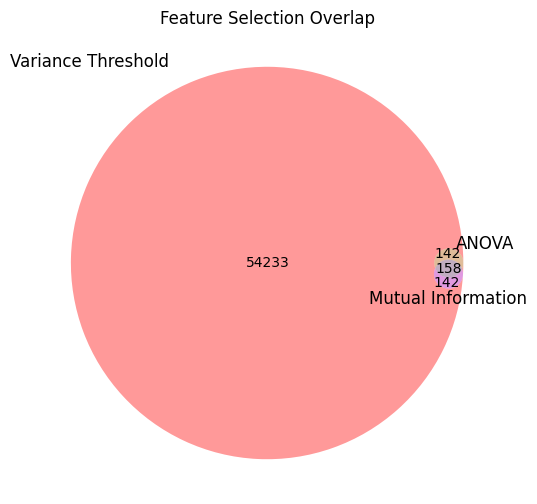

In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3  

# Convert numpy arrays to flattened lists for compatibility
variance_features = set(X_var.ravel())
anova_features = set(X_anova.ravel())
mutual_info_features = set(X_mut.ravel())

# Create a Venn diagram to visualize the overlap
plt.figure(figsize=(8, 6))
venn_diagram = venn3(
    subsets=(
        len(variance_features - anova_features - mutual_info_features),  # Only Variance
        len(anova_features - variance_features - mutual_info_features),  # Only ANOVA
        len(variance_features & anova_features - mutual_info_features),  # Variance & ANOVA
        len(mutual_info_features - variance_features - anova_features),  # Only Mutual Info
        len(variance_features & mutual_info_features - anova_features),  # Variance & Mutual Info
        len(anova_features & mutual_info_features - variance_features),  # ANOVA & Mutual Info
        len(variance_features & anova_features & mutual_info_features),  # All 3 Methods
    ),
    set_labels=("Variance Threshold", "ANOVA", "Mutual Information"),
)
plt.title("Feature Selection Overlap")
plt.show()


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Perform feature_selection (ANOVA, Mutual Information, Reduce Overlap)
def feature_selection(X,y):
    # Perform ANOVA
    k_best_selector = SelectKBest(score_func=f_classif, k=300)
    X_anova = k_best_selector.fit_transform(X,y)
    X_anova = X.columns[k_best_selector.get_support()]
    
    # Perform Mutual Information
    mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=300)
    X_mut = mutual_info_selector.fit_transform(X,y)
    X_mut = X.columns[mutual_info_selector.get_support()]
    
    # # Reduce overlap
    # X_reduce = set(X_anova).difference(set(X_mut))
    # X_reduce = X[list(X_reduce)]
    
    # X_reduce = X_anova.intersection(X_mut)  # Features in both ANOVA and Mutual Information
    # X_reduce = X[list(X_reduce)]  # Subset of data with overlapping features
    
    combined_features = set(X_anova).union(set(X_mut)).union(set(X_var))
    X_reduce = X[list(combined_features)]  # Subset the data to include combined features
    
    return X_reduce

X = feature_selection(X,y)
display(X.head(5))

,238388_x_at,217784_at,227672_at,1559663_at,202534_x_at,228405_at,224179_s_at,1552839_at,1570315_at,1556368_at,...,203305_at,218929_at,239899_at,240177_at,1566951_at,1558411_at,226235_at,216903_s_at,1554440_at,215454_x_at
0,5.029811,6.674299,6.363744,3.599104,5.111214,4.651466,3.689568,2.248077,4.110692,2.517728,...,6.585499,5.400750,2.576637,2.807573,2.233937,2.382939,6.490022,7.209933,2.488274,5.657036
1,5.112054,7.008691,6.595200,3.442943,9.511106,5.806120,4.541473,3.234905,5.221262,3.395097,...,5.556683,5.513349,2.812630,2.884821,3.322116,2.559554,7.944474,8.295001,2.808527,5.246000
2,6.266095,7.550801,7.251719,3.852906,6.861011,5.913252,5.457879,3.220037,5.726334,4.105204,...,8.879121,7.608164,3.742258,3.657893,3.615659,4.081790,8.621846,9.113518,3.825052,12.395258
3,6.135004,8.824154,7.585635,3.743313,9.242340,6.860689,4.726817,3.891107,5.711041,4.096657,...,7.345335,8.586088,3.680203,4.243855,4.161171,3.122976,7.667858,9.009704,4.935529,6.593566
4,5.687635,6.806639,6.572151,3.205625,9.069513,6.386390,4.894569,3.464237,5.580804,3.087809,...,6.477203,6.285154,3.360116,3.076190,3.571576,2.867347,7.605164,8.147059,3.036678,5.526937


In [8]:
display(X,y)

,238388_x_at,217784_at,227672_at,1559663_at,202534_x_at,228405_at,224179_s_at,1552839_at,1570315_at,1556368_at,...,203305_at,218929_at,239899_at,240177_at,1566951_at,1558411_at,226235_at,216903_s_at,1554440_at,215454_x_at
0,5.029811,6.674299,6.363744,3.599104,5.111214,4.651466,3.689568,2.248077,4.110692,2.517728,...,6.585499,5.400750,2.576637,2.807573,2.233937,2.382939,6.490022,7.209933,2.488274,5.657036
1,5.112054,7.008691,6.595200,3.442943,9.511106,5.806120,4.541473,3.234905,5.221262,3.395097,...,5.556683,5.513349,2.812630,2.884821,3.322116,2.559554,7.944474,8.295001,2.808527,5.246000
2,6.266095,7.550801,7.251719,3.852906,6.861011,5.913252,5.457879,3.220037,5.726334,4.105204,...,8.879121,7.608164,3.742258,3.657893,3.615659,4.081790,8.621846,9.113518,3.825052,12.395258
3,6.135004,8.824154,7.585635,3.743313,9.242340,6.860689,4.726817,3.891107,5.711041,4.096657,...,7.345335,8.586088,3.680203,4.243855,4.161171,3.122976,7.667858,9.009704,4.935529,6.593566
4,5.687635,6.806639,6.572151,3.205625,9.069513,6.386390,4.894569,3.464237,5.580804,3.087809,...,6.477203,6.285154,3.360116,3.076190,3.571576,2.867347,7.605164,8.147059,3.036678,5.526937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,5.800597,6.822442,7.130762,3.425058,8.473468,5.905895,5.058941,3.174386,5.292136,2.932354,...,5.541659,6.472994,3.275064,3.107851,3.392743,5.286377,7.855606,8.490637,2.838916,6.014850
140,7.448654,8.816337,8.922971,4.566191,9.223569,8.328722,7.544974,6.166910,6.988882,5.906030,...,10.243942,8.127889,7.178143,5.229891,6.458987,4.796366,8.490557,10.045595,5.650110,7.256476
141,5.282412,7.188146,6.258815,4.745538,8.856930,5.786028,4.975722,3.134078,5.125790,2.985531,...,4.219019,6.403049,3.157548,2.786275,3.349358,2.979889,5.542369,8.982469,3.348267,5.287594
142,5.655530,7.889048,7.604022,3.593613,7.950132,6.542679,4.668660,3.738049,5.533039,3.564837,...,6.398146,7.062915,3.889134,4.269071,4.220868,3.154637,8.313478,8.944499,3.807481,6.432389


0      0
1      1
2      0
3      0
4      1
      ..
139    1
140    0
141    1
142    0
143    0
Name: cancer_type, Length: 144, dtype: int64

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

# Define Training Pipeline with Random Forest
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Adjust n_estimators as needed
])

# Define Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
accuracy_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Perform K-Fold Cross-Validation
fold = 1
for train_index, test_index in skf.split(X, y):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Append scores
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    
    # Print results for the current fold
    print(f"Fold {fold} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print("-" * 30)
    
    fold += 1

# Final summary of metrics
print("\nCross-Validation Summary:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.4f}")
print(f"Mean ROC AUC: {np.mean(roc_auc_scores):.4f}")


Fold 1 Results:
  Accuracy: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000
------------------------------
Fold 2 Results:
  Accuracy: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000
------------------------------
Fold 3 Results:
  Accuracy: 0.9655
  Recall: 1.0000
  F1 Score: 0.9677
  ROC AUC: 0.9762
------------------------------
Fold 4 Results:
  Accuracy: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000
------------------------------
Fold 5 Results:
  Accuracy: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000
------------------------------

Cross-Validation Summary:
Mean Accuracy: 0.9931
Mean Recall: 1.0000
Mean F1 Score: 0.9935
Mean ROC AUC: 0.9952


In [23]:
import pandas as pd
from sklearn.utils import shuffle

# Load and shuffle the dataset
test_liver = pd.read_csv("Dataset/liver_test_data.csv")
X_test, y_test = preprocessing(test_liver)
X_test = X_test[X.columns]
display(X_test, y_test)

,238388_x_at,217784_at,227672_at,1559663_at,202534_x_at,228405_at,224179_s_at,1552839_at,1570315_at,1556368_at,...,203305_at,218929_at,239899_at,240177_at,1566951_at,1558411_at,226235_at,216903_s_at,1554440_at,215454_x_at
0,7.783650,9.023616,7.904564,3.994269,8.826429,8.152477,6.792753,4.202891,6.343654,4.801736,...,7.764687,8.909022,5.372430,5.787134,5.977201,5.503237,8.990135,10.371105,4.947385,7.592880
1,7.608440,8.779251,8.691766,3.964347,8.550942,7.698653,6.434160,4.427659,6.732863,5.923386,...,8.440360,9.393714,5.217811,5.353448,5.568108,5.600619,8.841113,11.007056,4.966936,7.219633
2,5.809472,5.745000,7.519824,2.706544,6.397554,6.614698,3.873674,3.932758,3.805982,3.580576,...,6.875061,4.290323,4.049691,3.169894,3.506833,2.825557,5.860473,6.274160,3.255133,5.569304
3,5.644442,6.316259,6.369184,3.146340,7.485904,5.553823,3.733413,3.320296,3.939057,2.692369,...,8.794493,5.767919,3.432874,2.695096,3.356033,2.568766,7.198218,7.005274,2.723599,5.300738
4,5.903699,8.919435,7.472692,3.591190,8.269973,6.772539,5.023822,3.728736,5.605676,3.944457,...,5.723309,7.426341,3.834621,4.017338,3.846006,3.193040,7.827385,8.858052,4.795616,7.011299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,6.925524,9.846791,10.264731,4.518726,8.900640,7.878189,7.450108,5.784950,6.857211,5.644695,...,10.395874,9.587489,6.456591,4.888935,6.057431,4.305391,8.194533,9.585923,5.499569,7.234978
57,7.154945,8.388751,8.463063,4.453763,9.283655,7.596242,7.389516,6.306188,6.729398,5.155313,...,10.060576,8.510704,6.920534,4.715714,5.715172,4.373546,9.105160,10.053956,5.439777,7.032217
58,6.116259,4.551351,7.574633,3.027083,6.734575,4.006833,4.106737,3.566409,4.834363,3.387022,...,4.857954,3.593543,4.052116,2.691217,3.366034,2.812785,3.302344,5.321943,2.877070,5.960251
59,6.431163,4.560012,7.565877,2.578221,6.028126,4.740745,3.487017,3.951009,5.192076,3.283562,...,4.915723,3.285554,4.087242,2.525919,3.401601,2.939114,3.221678,5.194967,3.343935,6.067356


0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Name: cancer_type, Length: 61, dtype: int64

In [24]:
# Predict using the final trained model
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print("\nFinal Model Evaluation on Test Dataset:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Final Model Evaluation on Test Dataset:
Accuracy: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00         9

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [25]:
import pandas as pd

# Create the report dataframe
report_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Probability (Liver)': y_pred_prob
})

# Save the report to the Dataset directory
output_path = "Dataset/test_set_prediction_report.csv"
report_df.to_csv(output_path, index=False)

print(f"Prediction report saved to {output_path}")


Prediction report saved to Dataset/test_set_prediction_report.csv


In [33]:
import pandas as pd

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability for class 1

# Extract feature importances from RandomForestClassifier
feature_importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = X.columns

# Loop through samples predicted as cancer (y = 1)
for i, (pred, prob) in enumerate(zip(y_pred, y_pred_prob)):
    if pred == 1:  # Only consider predictions for class 1 (cancer)
        sample_features = X_test.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * feature_importances  # Calculate scaled contributions
        
        # Create a DataFrame for contributions
        contribution_df = pd.DataFrame({
            'Feature': feature_names,
            'Contribution': contributions
        }).sort_values(by='Contribution', ascending=False)  # Sort by contribution
        
        # Print details for the sample
        print(f"\nSample {i}: Predicted Probability (Cancer - Class 1): {prob:.4f}")
        print("Top Contributing Features for This Sample:")
        print(contribution_df.head(10))  # Display top 10 contributing features



Sample 16: Predicted Probability (Cancer - Class 1): 0.9400
Top Contributing Features for This Sample:
           Feature  Contribution
21770  204561_x_at      0.260909
4557   206916_x_at      0.247221
40915  206651_s_at      0.240023
13004    210215_at      0.224232
35070  211298_s_at      0.134712
6390   203400_s_at      0.132722
15134  219466_s_at      0.127384
10382  205649_s_at      0.126513
37528  205041_s_at      0.124181
33892    207218_at      0.120506

Sample 17: Predicted Probability (Cancer - Class 1): 0.8900
Top Contributing Features for This Sample:
           Feature  Contribution
21770  204561_x_at      0.255897
40915  206651_s_at      0.244601
4557   206916_x_at      0.227500
13004    210215_at      0.222653
35070  211298_s_at      0.133450
6390   203400_s_at      0.130444
15134  219466_s_at      0.129778
37528  205041_s_at      0.122338
10382  205649_s_at      0.121891
35561    204988_at      0.118828

Sample 18: Predicted Probability (Cancer - Class 1): 0.9800
Top C

In [35]:
# Save model

import joblib
joblib.dump(pipeline, 'liver.joblib')

['liver.joblib']